In [3]:
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

from tensorflow import keras
from tensorflow.keras import initializers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D

In [4]:
# Load in the data
cifar10 = tf.keras.datasets.cifar10
 
# Distribute it to train and test set
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


In [5]:
input_shape = (32, 32, 3)
batch_size = 128
num_classes = 10
epochs = 75

In [6]:
# Preprocess the data
# Normalize all image data
x_train = x_train / 255.0
x_test = x_test / 255.0


# One-hot encoding for the labels
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

<Figure size 1440x1440 with 0 Axes>

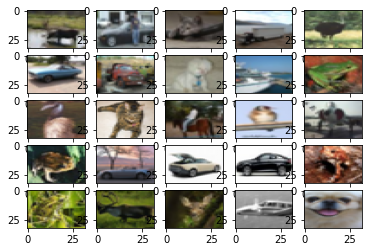

In [12]:
# Visualize data by plotting images

plt.figure(figsize=(20, 20))
fig, ax = plt.subplots(5, 5)

for i in range(5):
	for j in range(5):
		ax[i][j].imshow(random.choice(x_train), aspect='auto')

plt.show()

In [8]:
model = tf.keras.Sequential(
    [
        keras.Input(shape=input_shape),
        tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu', kernel_initializer=initializers.RandomUniform(minval=-0.05, maxval=0.05)),
        tf.keras.layers.Conv2D(32, (7,7), padding='same', activation='relu'),
        tf.keras.layers.Dropout(0.50),
        tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(64, (5,5), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
        tf.keras.layers.MaxPool2D(),
        tf.keras.layers.Dropout(0.30),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dropout(0.4),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(32, activation='relu'),
        tf.keras.layers.Dense(num_classes, activation='softmax')
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        4736      
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        50208     
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 conv2d_3 (Conv2D)           (None, 32, 32, 64)        102464    
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                        

In [9]:
# Compile and train the model
model.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=["accuracy"])

history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_split=0.1)

Epoch 1/75
352/352 [==============================] - 28s 43ms/step - loss: 2.0596 - accuracy: 0.2078 - val_loss: 1.7552 - val_accuracy: 0.3312
Epoch 2/75
352/352 [==============================] - 14s 41ms/step - loss: 1.7281 - accuracy: 0.3459 - val_loss: 1.6470 - val_accuracy: 0.3922
Epoch 3/75
352/352 [==============================] - 15s 42ms/step - loss: 1.5914 - accuracy: 0.4054 - val_loss: 1.4784 - val_accuracy: 0.4476
Epoch 4/75
352/352 [==============================] - 15s 42ms/step - loss: 1.4956 - accuracy: 0.4508 - val_loss: 1.3827 - val_accuracy: 0.5040
Epoch 5/75
352/352 [==============================] - 15s 42ms/step - loss: 1.4214 - accuracy: 0.4829 - val_loss: 1.3132 - val_accuracy: 0.5272
Epoch 6/75
352/352 [==============================] - 15s 42ms/step - loss: 1.3654 - accuracy: 0.5094 - val_loss: 1.1888 - val_accuracy: 0.5734
Epoch 7/75
352/352 [==============================] - 15s 42ms/step - loss: 1.3043 - accuracy: 0.5332 - val_loss: 1.1977 - val_accuracy:

In [10]:
test_loss, test_acc = model.evaluate(x_test, y_test)

313/313 [==============================] - 2s 6ms/step - loss: 0.7890 - accuracy: 0.7439


In [13]:
# Get predictions for test data and custom data.
# Decode one-hot groundtruth labels and predicted labels for test data and custom data.
test_predictions = model.predict(x_test)

groundtruth_test_labels = tf.argmax(y_test, axis=1)

predicted_test_labels = tf.argmax(test_predictions, axis=1)

In [14]:
 # Print confusion matrices.
confusion_matrix_test = confusion_matrix(groundtruth_test_labels,predicted_test_labels)
print("confusion_matrix_test")
print(confusion_matrix_test)

confusion_matrix_test
[[694  17  77  34  28   5  15  10  80  40]
 [  5 872   4  10   2   2  16   5  13  71]
 [ 49   2 662  60  73  44  75  16  11   8]
 [  7   4  92 560  62 115 112  28   7  13]
 [  8   2  90  55 678  22  89  49   7   0]
 [  1   0  61 192  55 612  41  28   5   5]
 [  2   0  40  47  16   9 880   3   2   1]
 [  5   0  35  38  60  49  21 781   3   8]
 [ 31  35  12  20   7   2   8   5 859  21]
 [ 14  57   4  26   6   2   8  19  23 841]]
